# Exploración de datos

## Parte 1 - Metadatos

In [1]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
import pydicom

In [2]:
# Ocultar advertencias
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

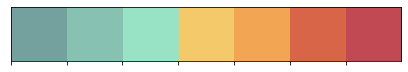

In [3]:
# Color Palettes para el notebook
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.palplot(sns.color_palette(custom_colors))

In [4]:
# Importación train + test data
train = pd.read_csv("../osic-pulmonary-fibrosis-progression/train.csv")
test = pd.read_csv("../osic-pulmonary-fibrosis-progression/test.csv")

### Datos generales

In [5]:
train.head(5)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [6]:
print("En el conjunto de datos hay {} pacientes.".format(train["Patient"].unique().shape[0]))

En el conjunto de datos hay 176 pacientes.


In [7]:
# Agrupamiento por pacientes
data = train.groupby(by="Patient")[["Patient", "SmokingStatus"]].first().reset_index(drop=True)
smokers = data.groupby(by="SmokingStatus").count()
display(smokers)

,Patient
SmokingStatus,
Currently smokes,9
Ex-smoker,118
Never smoked,49


In [8]:
print("Fumadores forman {}% de la prueba".format(round(data.loc[data["SmokingStatus"] == "Currently smokes"].shape[0] / data.shape[0] * 100,2)))
print("Ex-fumadores forman {}% de la prueba".format(round(data.loc[data["SmokingStatus"] == "Ex-smoker"].shape[0] / data.shape[0] * 100,2)))
print("Personas que nunca han fumado forman {}% de la prueba".format(round(data.loc[data["SmokingStatus"] == "Never smoked"].shape[0] / data.shape[0] * 100,2)))

Fumadores forman 5.11% de la prueba
Ex-fumadores forman 67.05% de la prueba
Personas que nunca han fumado forman 27.84% de la prueba


### Distribuciones de sexo, edad, tabaquismo

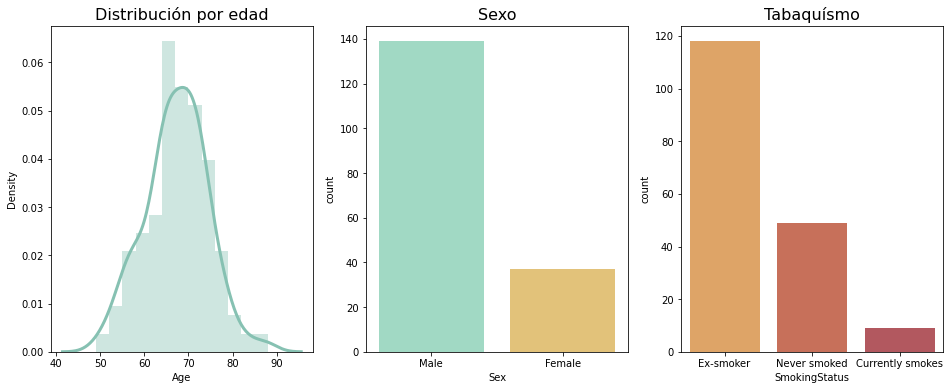

In [9]:
# Select unique bio info for the patients
data = train.groupby(by="Patient")[["Patient", "Age", "Sex", "SmokingStatus"]].first().reset_index(drop=True)

# Figure
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 6))

a = sns.distplot(data["Age"], ax=ax1, color=custom_colors[1], kde_kws=dict(lw=3))
b = sns.countplot(data["Sex"], ax=ax2, palette=custom_colors[2:4])
c = sns.countplot(data["SmokingStatus"], ax=ax3, palette = custom_colors[4:7])

a.set_title("Distribución por edad", fontsize=16)
b.set_title("Sexo", fontsize=16)
c.set_title("Tabaquísmo", fontsize=16);

### Distribuciones de FVC y "Percent"

Min FVC value: 827 
Max FVC value: 6,399 

Min Percent value: 28.88% 
Max Percent value: 153.1%


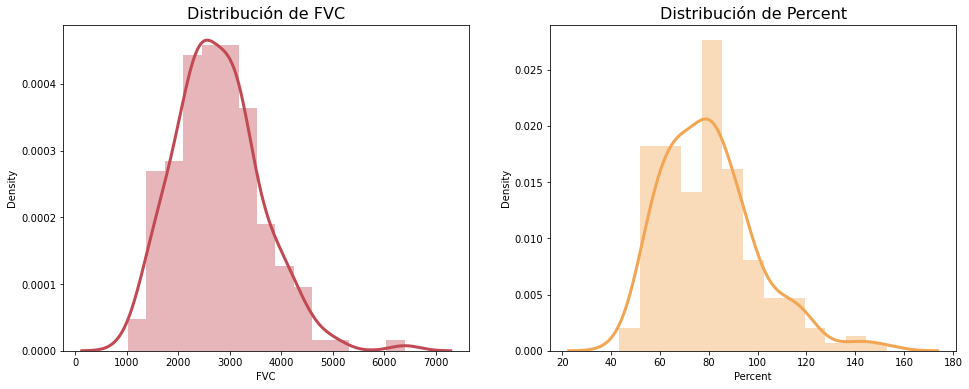

In [10]:
print("Min FVC value: {:,}".format(train["FVC"].min()), "\n" +
      "Max FVC value: {:,}".format(train["FVC"].max()), "\n" +
      "\n" +
      "Min Percent value: {:.4}%".format(train["Percent"].min()), "\n" +
      "Max Percent value: {:.4}%".format(train["Percent"].max()))

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.distplot(train.groupby(by="Patient").first()["FVC"], ax=ax1, color=custom_colors[6], hist=True, kde_kws=dict(lw=3))
b = sns.distplot(train.groupby(by="Patient").first()["Percent"], ax=ax2, color=custom_colors[4], hist=True, kde_kws=dict(lw=3))

a.set_title("Distribución de FVC", fontsize=16)
b.set_title("Distribución de Percent", fontsize=16);

In [11]:
data = train.groupby(by="Patient").first().reset_index(drop=True)
display(data["Percent"].mean())

80.1729041085646

### Distribución de "Weeks"

Average no. of the last week: 66.8125
Minimum no. weeks before CT: -5 
Maximum no. weeks after CT: 133


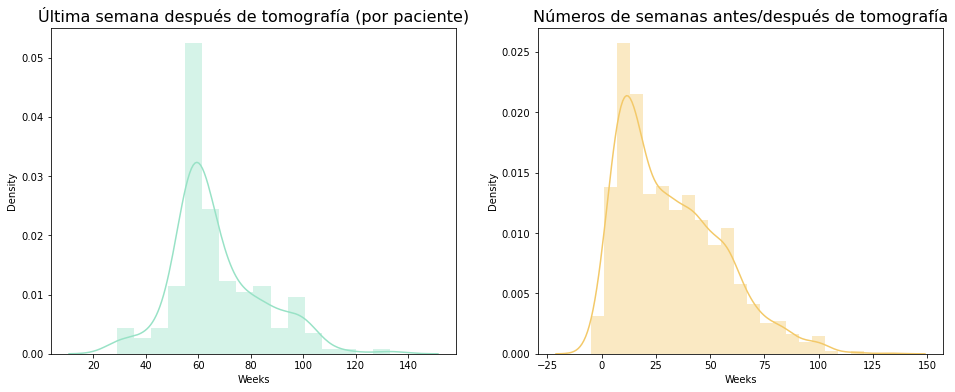

In [12]:
print("Average no. of the last week: {}".format(train.groupby("Patient")['Weeks'].max().mean()))

print("Minimum no. weeks before CT: {}".format(train['Weeks'].min()), "\n" +
      "Maximum no. weeks after CT: {}".format(train['Weeks'].max()))

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.distplot(train.groupby("Patient")['Weeks'].max(), ax=ax1, color=custom_colors[2], kde=True)
b = sns.distplot(train['Weeks'], ax=ax2, color=custom_colors[3], kde=True)

a.set_title("Última semana después de tomografía (por paciente)", fontsize=16)
b.set_title("Números de semanas antes/después de tomografía", fontsize=16);

### Relación entre FVC y tabaquismo

Text(0.5, 1.0, 'FVC (primera visita) por tabaquismo')

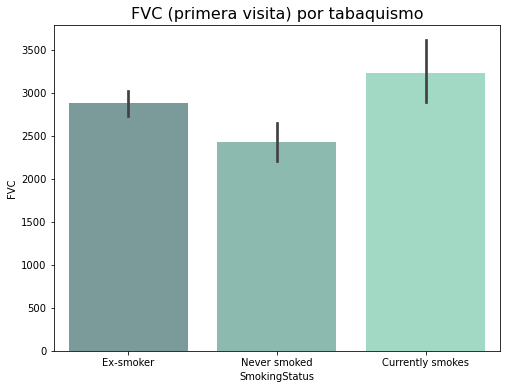

In [13]:
# Figure
fig, ax = plt.subplots(figsize = (8, 6))

ax = sns.barplot(x = train.groupby(by="Patient").first()["SmokingStatus"], y = train.groupby(by="Patient").first()["FVC"], ax=ax, palette=custom_colors[0:4])
ax.set_title("FVC (primera visita) por tabaquismo", fontsize=16)

Text(0.5, 1.0, 'FVC (última visita) por tabaquismo')

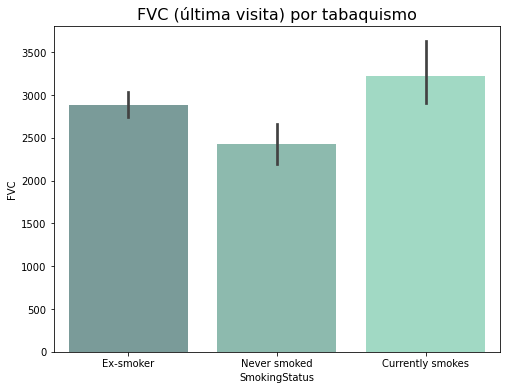

In [14]:
# Figure
fig, ax = plt.subplots(figsize = (8, 6))

ax = sns.barplot(x = train.groupby(by="Patient").last()["SmokingStatus"], y = train.groupby(by="Patient").first()["FVC"], ax=ax, palette=custom_colors[0:4])
ax.set_title("FVC (última visita) por tabaquismo", fontsize=16)

In [16]:
print("FVC medio en la primera semana: {}".format(train.groupby("Patient").first()["FVC"].mean()))
print("FVC medio en la última semana: {}".format(train.groupby("Patient").last()["FVC"].mean()))

FVC medio en la primera semana: 2771.744318181818
FVC medio en la última semana: 2530.056818181818


In [17]:
currently_smokes = train.sort_values(by="Weeks").loc[train['SmokingStatus'] == "Currently smokes"].groupby("Patient")
never_smoked = train.sort_values(by="Weeks").loc[train['SmokingStatus'] == "Never smoked"].groupby("Patient")
ex_smoker = train.sort_values(by="Weeks").loc[train['SmokingStatus'] == "Ex-smoker"].groupby("Patient")

In [16]:
print("Cambio medio a lo largo del tratamiento (Fumadores): {}".format(round((currently_smokes.last()["FVC"] - currently_smokes.first()["FVC"]).mean(),2)))
print("Cambio medio a lo largo del tratamiento (Jamás han fumado): {}".format(round((never_smoked.last()["FVC"] - never_smoked.first()["FVC"]).mean(),2)))
print("Cambio medio a lo largo del tratamiento (Exfumadores): {}".format(round((ex_smoker.last()["FVC"] - ex_smoker.first()["FVC"]).mean(),2)))

Cambio medio a lo largo del tratamiento (Fumadores): 54.22
Cambio medio a lo largo del tratamiento (Jamás han fumado): -240.88
Cambio medio a lo largo del tratamiento (Exfumadores): -266.07


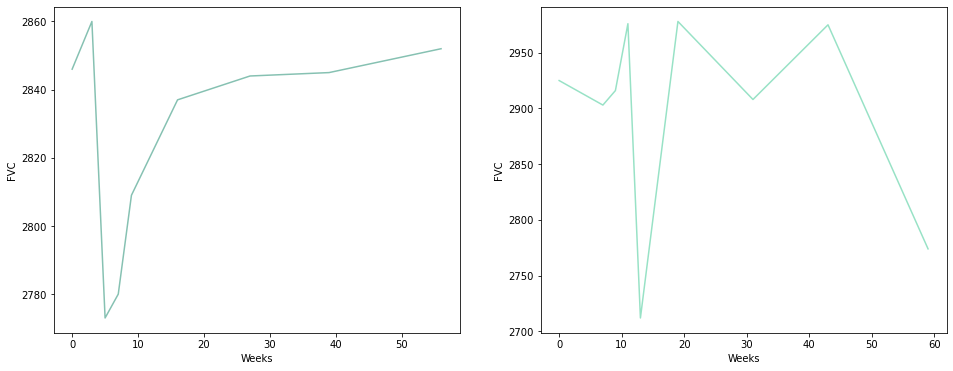

In [17]:
# Select random patient ids
random_smoker = currently_smokes.get_group(random.choice(list(currently_smokes.groups.keys())))
random_nonsmoker = never_smoked.get_group(random.choice(list(never_smoked.groups.keys())))

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.lineplot(data=random_smoker, x="Weeks", y="FVC", ax=ax1, color=custom_colors[1])
b = sns.lineplot(data=random_nonsmoker, x="Weeks", y="FVC", ax=ax2, color=custom_colors[2])

## Parte 2 - Datos de imagen

In [18]:
# Create base director for Train .dcm files
director = "../osic-pulmonary-fibrosis-progression/train"

# Create path column with the path to each patient's CT
train["Path"] = director + "/" + train["Patient"]

# Create variable that shows how many CT scans each patient has
train["CT_number"] = 0

for k, path in enumerate(train["Path"]):
    train["CT_number"][k] = len(os.listdir(path))

C:\Apps\Anaconda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [19]:
print("Minimum number of CT scans: {}".format(train["CT_number"].min()), "\n" +
      "Maximum number of CT scans: {:,}".format(train["CT_number"].max()))

Minimum number of CT scans: 12 
Maximum number of CT scans: 1,018


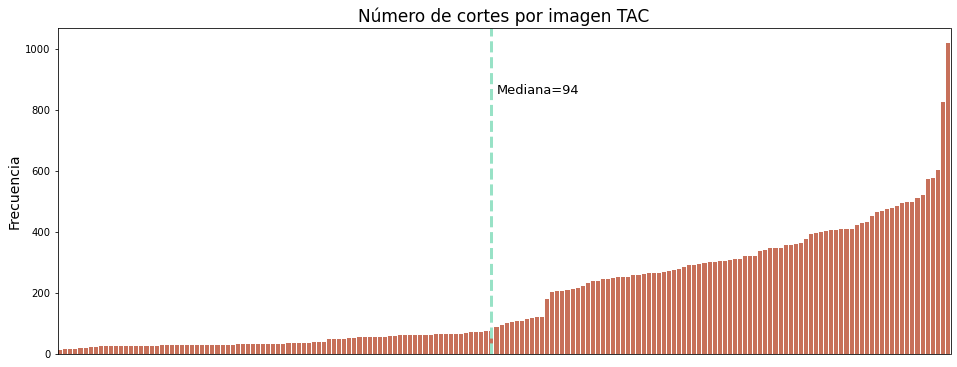

In [22]:
# Scans per Patient
data = train.groupby(by="Patient")["CT_number"].first().reset_index(drop=False)
# Sort by Weeks
data = data.sort_values(['CT_number']).reset_index(drop=True)

# Plot
plt.figure(figsize = (16, 6))
p = sns.barplot(data["Patient"], data["CT_number"], color=custom_colors[5])
plt.axvline(x=85, color=custom_colors[2], linestyle='--', lw=3)

plt.title("Número de cortes por imagen TAC", fontsize = 17)
plt.xlabel('Paciente', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.text(86, 850, "Mediana=94", fontsize=13)

p.axes.get_xaxis().set_visible(False);

### Visualización de primero corte para varios pacientes

Patient id.......: ID00401637202305320178010 
Modality.........: CT 
Rows.............: 512 
Columns..........: 512


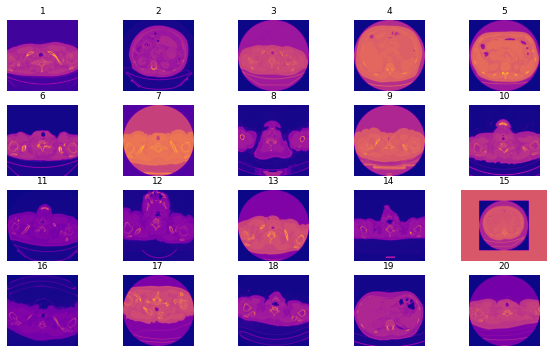

In [21]:
# Figure
fig=plt.figure(figsize=(10, 6))
columns = 5
rows = 4

    
for i in range(1, columns*rows +1):
    img = pydicom.dcmread("../osic-pulmonary-fibrosis-progression/train/" + train["Patient"].unique()[i + 10] + "/1.dcm").pixel_array
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="plasma")
    plt.title(i, fontsize = 9)
    plt.axis('off');
    
dataset = pydicom.dcmread("../osic-pulmonary-fibrosis-progression/train/" + random.choice(train["Patient"]) + "/10.dcm")

print("Patient id.......:", dataset.PatientID, "\n" +
      "Modality.........:", dataset.Modality, "\n" +
      "Rows.............:", dataset.Rows, "\n" +
      "Columns..........:", dataset.Columns)

### Propiedades de DICOM

In [22]:
display(dataset)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.102540268227884294366255796481003747892
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0018) SOP Instance UID                    UI: 2.25.102540268227884294366255796481003747892
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070